In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [2]:
tf.__version__

'2.8.0'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

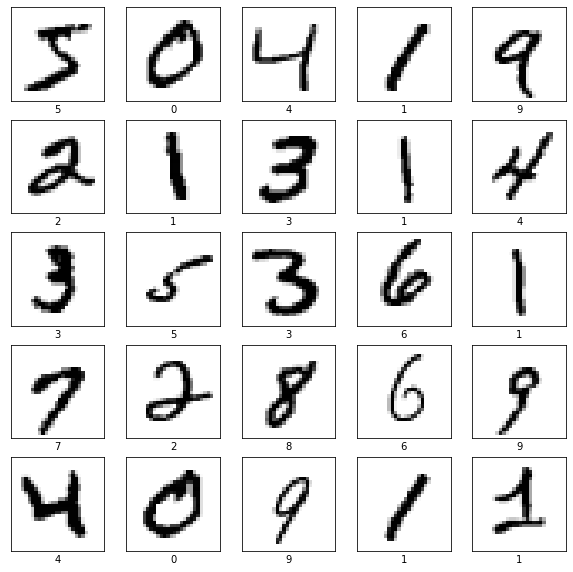

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

In [7]:
train_images.shape

(60000, 28, 28)

In [15]:
test_images.shape

(10000, 28, 28)

In [105]:
test_images[0:12]

(12, 28, 28, 1)

Text(0.5, 1.0, 'Ground Truth : 7')

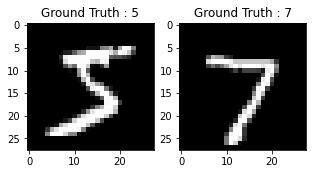

In [18]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [19]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.
test_images = test_images / 255.

## One hot encoded vector

In [23]:
from tensorflow.keras.utils import to_categorical
# Change the labels from categorical to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_labels_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images, train_labels_one_hot, test_size=0.1, random_state=13)

## CNN Model

In [25]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [26]:
batch_size = 64
epochs = 10
num_classes = 10

In [27]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model.add(MaxPooling2D((2, 2),padding='same'))
mnist_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='linear'))
mnist_model.add(Dense(num_classes, activation='softmax'))

2022-07-12 23:42:13.898116: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:

mnist_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [30]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [31]:
mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
844/844 [==============================] - 28s 33ms/step - loss: 0.1561 - accuracy: 0.9515 - val_loss: 0.0661 - val_accuracy: 0.9793
Epoch 2/10
844/844 [==============================] - 28s 33ms/step - loss: 0.0616 - accuracy: 0.9803 - val_loss: 0.0615 - val_accuracy: 0.9835
Epoch 3/10
844/844 [==============================] - 27s 32ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 4/10
844/844 [==============================] - 26s 31ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0555 - val_accuracy: 0.9838
Epoch 5/10
844/844 [==============================] - 25s 30ms/step - loss: 0.0320 - accuracy: 0.9892 - val_loss: 0.0610 - val_accuracy: 0.9832
Epoch 6/10
844/844 [==============================] - 24s 28ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0538 - val_accuracy: 0.9862
Epoch 7/10
844/844 [==============================] - 23s 27ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0664 - val_accuracy:

In [34]:
test_eval = mnist_model.evaluate(test_images, test_labels_one_hot, verbose=0)

In [35]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.08111893385648727
Test accuracy: 0.9810000061988831


## visulization

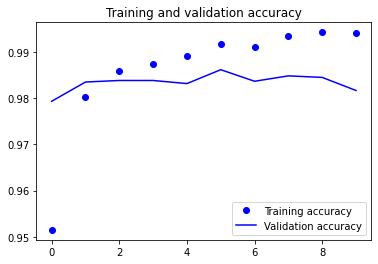

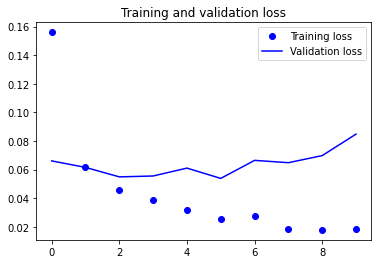

In [37]:
accuracy = mnist_train.history['accuracy']
val_accuracy = mnist_train.history['val_accuracy']
loss = mnist_train.history['loss']
val_loss = mnist_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Images correctly classified and misclassified

In [38]:
predicted_classes = mnist_model.predict(test_images)

In [39]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9810 correct labels


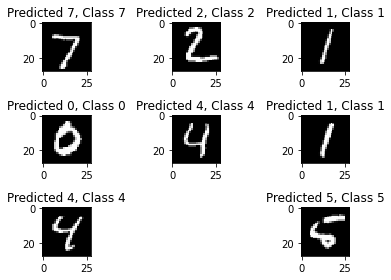

In [40]:
correct = np.where(predicted_classes==test_labels)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

Found 190 incorrect labels


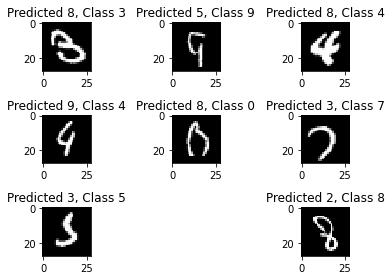

In [41]:
incorrect = np.where(predicted_classes!=test_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()

# Model Interpretability

To address the problem of prediction and interpretability, we present a unified framework for interpreting predictions, SHAP (SHapley Additive exPlanations). SHAP assigns each feature an importance value for a particular prediction. Its novel components include: (1) the identification of a new class of additive feature importance measures, and (2) theoretical results showing there is a unique solution in this class with a set of desirable properties.

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

In a nutshell, SHAP values are used whenever you have a complex model (could be a gradient boosting, a neural network, or anything that takes some features as input and produces some predictions as output) and you want to understand what decisions the model is making.

In [42]:
!pip install -U shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.5/436.5 KB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 16.9 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [43]:
import shap
import numpy as np

# Let's select a set of background examples to take an expectation over
background = train_images[np.random.choice(train_images.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(mnist_model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(test_images[1:5])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


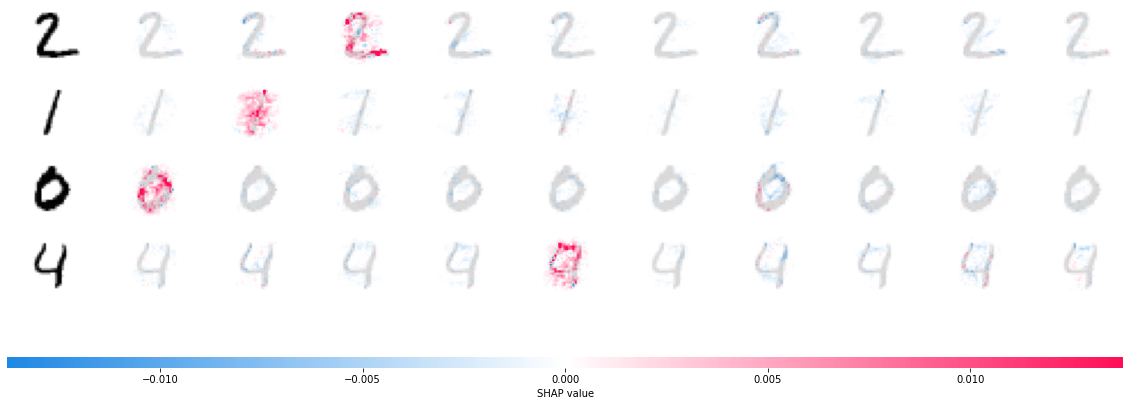

In [44]:
# plot the feature attributions
shap.image_plot(shap_values, -test_images[1:5])

The plot above explains ten outputs (digits 0-9) for four different images. Red pixels increase the model's output while blue pixels decrease the output. The input images are shown on the left, and as nearly transparent grayscale backings behind each of the explanations. The sum of the SHAP values equals the difference between the expected model output (averaged over the background dataset) and the current model output. Note that for the 'zero' image the blank middle is important, while for the 'four' image the lack of a connection on top makes it a four instead of a nine.

In [101]:
# shap.summary_plot(shap_values, -test_images[1:5])

In [102]:
# shap.summary_plot(shap_values, test_images[1], plot_type='bar')
# fig = shap.summary_plot(shap_values, features=test_images[1:5], show=False)

In [92]:
# Let's select a set of background examples to take an expectation over
background2 = train_images[np.random.choice(train_images.shape[0], 10, replace=False)]

# explain predictions of the model on three images
e2 = shap.DeepExplainer(mnist_model, background2)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values2 = e2.shap_values(test_images[1:5])

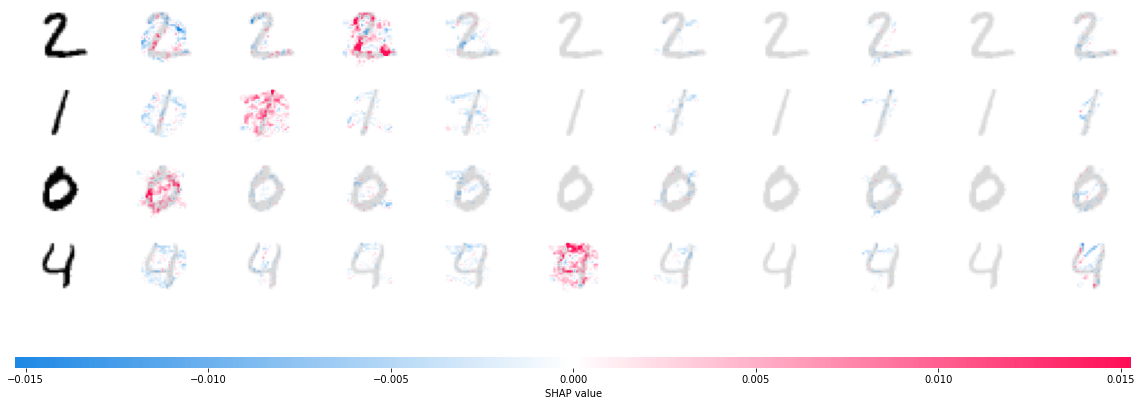

In [93]:
# plot the feature attributions
shap.image_plot(shap_values2, -test_images[1:5])

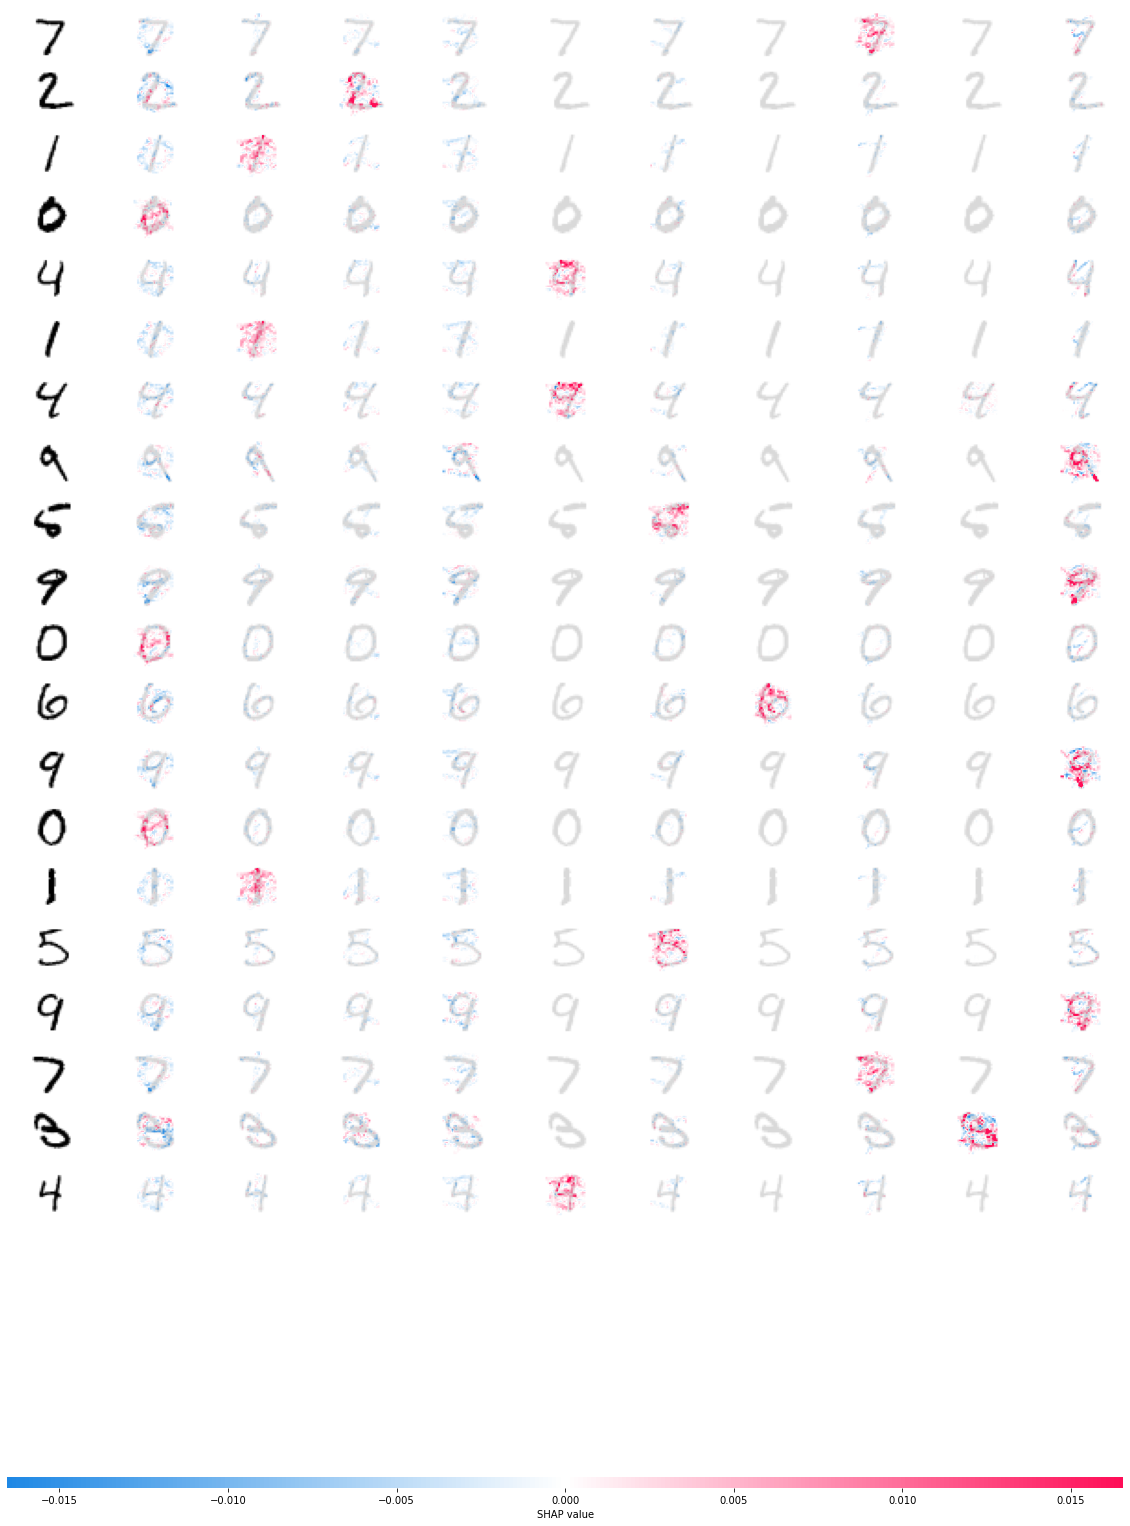

In [107]:
# Let's select a set of background examples to take an expectation over
background3 = train_images[np.random.choice(train_images.shape[0], 10, replace=False)]

# explain predictions of the model on three images
e3 = shap.DeepExplainer(mnist_model, background2)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values3 = e3.shap_values(test_images[0:20])
# plot the feature attributions
shap.image_plot(shap_values3, -test_images[0:20])

In [45]:
index_mask = np.where(test_labels_one_hot[:, 2])[0]
print(index_mask)
subset_mask = np.random.choice(index_mask, 10)
print(subset_mask)

[   1   35   38 ... 9980 9985 9995]
[ 418 9578 4716 3775 4476 4713 7321 3817 8315 7781]


In [46]:
original_images = test_images[subset_mask]
original_labels = test_labels_one_hot[subset_mask]

In [47]:
predicted_2 = mnist_model.predict(original_images)

In [48]:
prediction_val = np.argmax(np.round(predicted_2),axis=1)
print("predictions", prediction_val)

predictions [2 2 2 2 2 2 2 2 2 2]


In [54]:
probabilities_val = mnist_model.predict(original_images)
# probabilities_val = mnist_model.predict(original_images)

# probabilities_val=np.argmax(probabilities_val,axis=1)
print ("probabilities", probabilities_val)

probabilities [[8.05082208e-21 8.68582873e-24 1.00000000e+00 3.29626810e-15
  5.86293784e-21 6.31149864e-22 9.16413933e-22 1.45866375e-09
  9.02528627e-17 1.00494538e-21]
 [4.54910249e-24 1.83058739e-23 1.00000000e+00 9.70809554e-16
  5.07548292e-27 1.58635299e-29 2.42393196e-23 8.44361776e-16
  1.41977399e-16 1.59158821e-24]
 [1.72032817e-22 8.22423001e-18 1.00000000e+00 1.89947591e-09
  3.39656567e-19 2.55684965e-19 5.48582212e-16 4.87533148e-12
  4.01104838e-09 5.78338765e-15]
 [8.58827629e-23 7.59136311e-24 1.00000000e+00 5.20328537e-11
  4.96296161e-27 3.70736574e-23 2.52563380e-20 6.04288181e-16
  9.51624249e-19 1.27479118e-23]
 [4.60004366e-15 3.59726193e-10 1.00000000e+00 8.85461565e-11
  3.85998952e-18 3.41720533e-18 2.04317135e-17 3.81147414e-12
  7.97356278e-12 1.02534298e-17]
 [2.90943046e-17 1.06796283e-16 9.99999523e-01 4.31348838e-07
  3.17432077e-15 2.70730212e-14 3.86467414e-10 1.54282139e-14
  8.79311846e-10 5.99147511e-12]
 [4.70604092e-23 2.04994484e-20 1.00000000e+

Correct label 2
Predicted label: 2
Confidence: 1.0


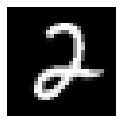

Correct label 2
Predicted label: 2
Confidence: 1.0


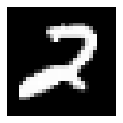

Correct label 2
Predicted label: 2
Confidence: 1.0


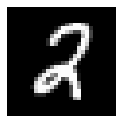

Correct label 2
Predicted label: 2
Confidence: 1.0


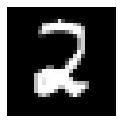

Correct label 2
Predicted label: 2
Confidence: 1.0


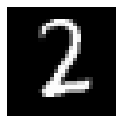

Correct label 2
Predicted label: 2
Confidence: 0.9999995


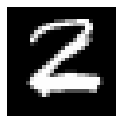

Correct label 2
Predicted label: 2
Confidence: 1.0


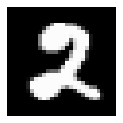

Correct label 2
Predicted label: 2
Confidence: 1.0


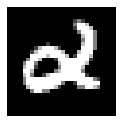

Correct label 2
Predicted label: 2
Confidence: 0.9999994


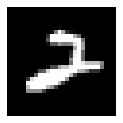

Correct label 2
Predicted label: 2
Confidence: 1.0


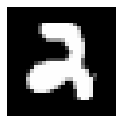

In [55]:
for i in range(0, 10):
    print('Correct label', np.argmax(original_labels[i]))
    print('Predicted label:', prediction_val[i])
    print('Confidence:', np.max(probabilities_val[i]))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(original_images[i].reshape([28, 28]),cmap = "gray")
    plt.show()

In [56]:
target_number = 6
n_steps = 10
eps = 0.5
adversarial_images = original_images.copy()

In [70]:
adversarial_images.shape

(10, 28, 28, 1)

In [64]:
target = to_categorical(target_number)
target_variable= K.variable(target)

In [65]:
target_variable

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [68]:
mnist_model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [1]:
# from keras import backend as K

# adv_img_hist = list()
# prob2_hist = list()
# prob6_hist = list()

# for i in range(n_steps):
#   # Convert 6 to binary vector
#   target = to_categorical(target_number)
#   target_variable = K.variable(target)
#   # Calculate Loss
#   loss = keras.metrics.categorical_crossentropy(mnist_model.input, target_variable)
#   # Obtain the value of gradient for creating adversarial example.
#   gradients = K.gradients(loss, mnist_model.input)
#   get_grad_values = K.function([mnist_model.input], gradients)
#   grad_values = get_grad_values([adversarial_images])[0]
#   # Create adversarial example by using the gradient values.
#   adversarial_images = adversarial_images + eps * np.sign(grad_values)
#   #Finally, clip the matrix to remove extra values.
#   adversarial_images = np.clip(adversarial_images, a_min=0, a_max=1)
#   adv_img_hist.append(adversarial_images)
#   # We now try to predict the classes of these adversarial examples and their probability
#   prediction = mnist_model.predict(adversarial_images)
#   print("predictions", prediction_val)
#   probs = mnist_model.predict_proba(adversarial_images)
#   print('Confidence 2:', np.max(probs[:, 2]))
#   print('Confidence 6:', np.max(probs[:, 6]))
# prob2_hist.append(probs[:,2])
# prob6_hist.append(probs[:,6])